# Predicting Insurance Charges with Linear Regression

In this notebook, we'll explore a dataset containing information about individuals' insurance charges and use Linear Regression to predict insurance costs based on various factors like age, BMI, smoking habits, etc.

## Dataset Overview
Let's start by loading and exploring the dataset.

## Importing the needed libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data
We load the dataset from a CSV file and display some basic information about the data.

In [3]:
data = pd.read_csv('medical_insurance.csv')

## Understanding our Data

In [4]:
# dispalying the number of rows and columns
data.shape

(2772, 7)

In [5]:
# displaying the first 5 rows
data.head()

# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


The dataset consists of 2772 entries with 7 columns:

- age: age of the person
- sex: gender (male/female)
- bmi: body mass index (BMI)
- children: number of children covered by the insurance
- smoker: smoking status (yes/no)
- region: region of the person
- charges: insurance charges

In [7]:
# check if there is missing data or values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### What we can conclude:
- as we can see, there are no missing values in our dataset.
- there are 3 categorical attributes [Sex, Smoker, Region]

# Exploring the dataset
## Summary Statistics
Let's examine the statistical measures of the dataset.

In [6]:
# Display statistical summary of the dataset
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


### what we can conclude
- Age Distribution:
The average age of individuals in the dataset is approximately 39 years, with a standard deviation of 14 years.
The age ranges from 18 to 64 years.

- BMI (Body Mass Index) Distribution:
The average BMI is around 30.7, with a standard deviation of 6.1.
BMI values range from 15.96 to 53.13.

- Children Distribution:
Most individuals in the dataset have either 0, 1, or 2 children, with a maximum of 5 children.

- Insurance Charges Distribution:
The mean insurance charge is approximately $13,261, with a wide range of charges from $1,121 to $63,770.
The distribution shows significant variability, as indicated by the standard deviation of approximately $12,152.

# Data Visualization

C:\Users\Aya Bouchair\AppData\Local\Temp\ipykernel_20760\3268654230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


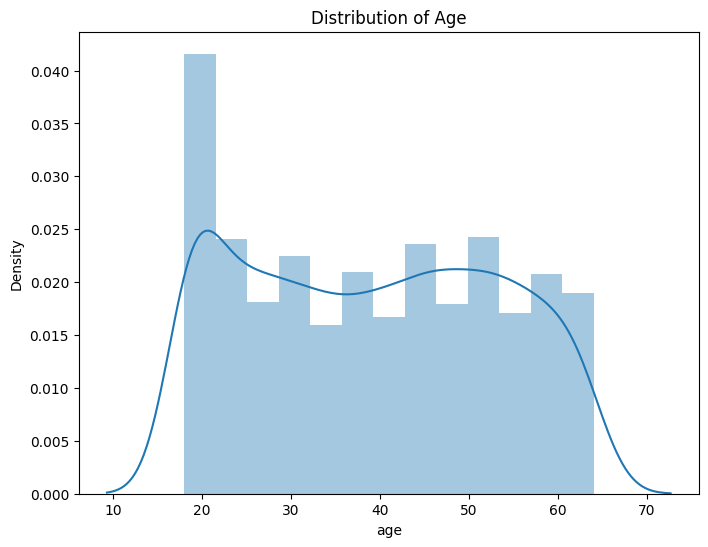

In [8]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.distplot(data['age'])
plt.title('Distribution of Age')
plt.show()


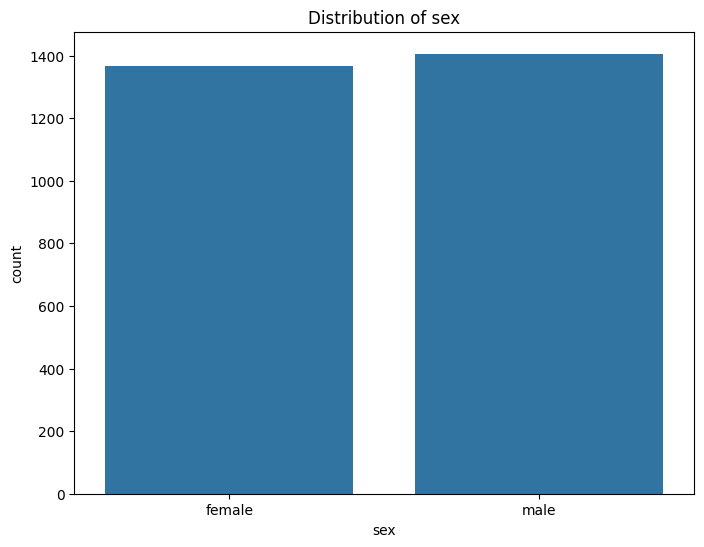

In [12]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('Distribution of sex')
plt.show()


C:\Users\Aya Bouchair\AppData\Local\Temp\ipykernel_20760\4109908854.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


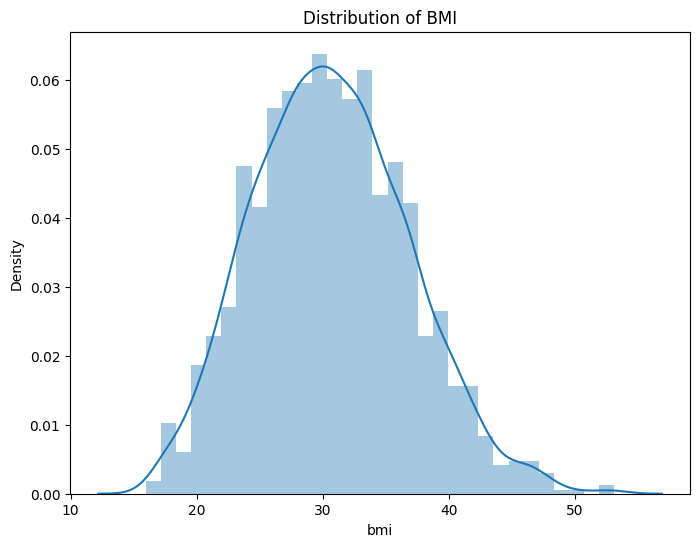

In [11]:
# BMI Distribution
plt.figure(figsize=(8, 6))
sns.distplot(data['bmi'])
plt.title('Distribution of BMI')
plt.show()


C:\Users\Aya Bouchair\AppData\Local\Temp\ipykernel_20760\2806007881.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['children'])


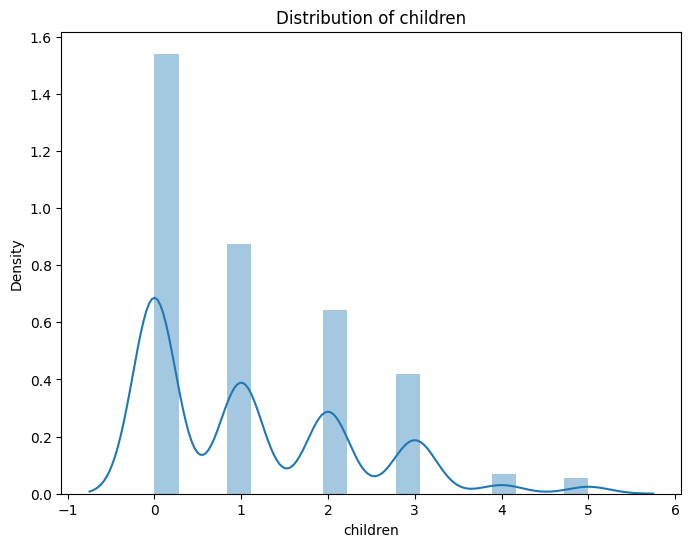

In [13]:
# children Distribution
plt.figure(figsize=(8, 6))
sns.distplot(data['children'])
plt.title('Distribution of children')
plt.show()

C:\Users\Aya Bouchair\AppData\Local\Temp\ipykernel_20760\1508962015.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


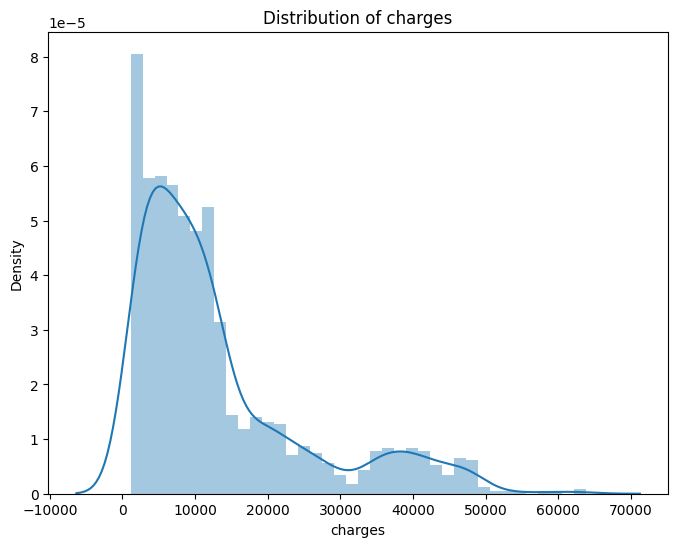

In [16]:
# charges Distribution
plt.figure(figsize=(8, 6))
sns.distplot(data['charges'])
plt.title('Distribution of charges')
plt.show()

# Data Preprocessing
## Encoding Categorical Variables:
We encode categorical variables (sex, smoker, region) into numerical format for model training.

In [17]:
# Encoding categorical columns
data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
data.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)


# Splitting Data into Training and Testing Sets


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
# Splitting the dataset into features (X) and target variable (Y)
X = data.drop(columns='charges', axis=1)
Y = data['charges']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X: (2772, 6)
Shape of X_train: (2217, 6)
Shape of X_test: (555, 6)


# Model Training
We use Linear Regression to train our model on the training data and evaluate its performance.

R-squared (training): 0.7561940076387632
R-squared (testing): 0.7272408044903713


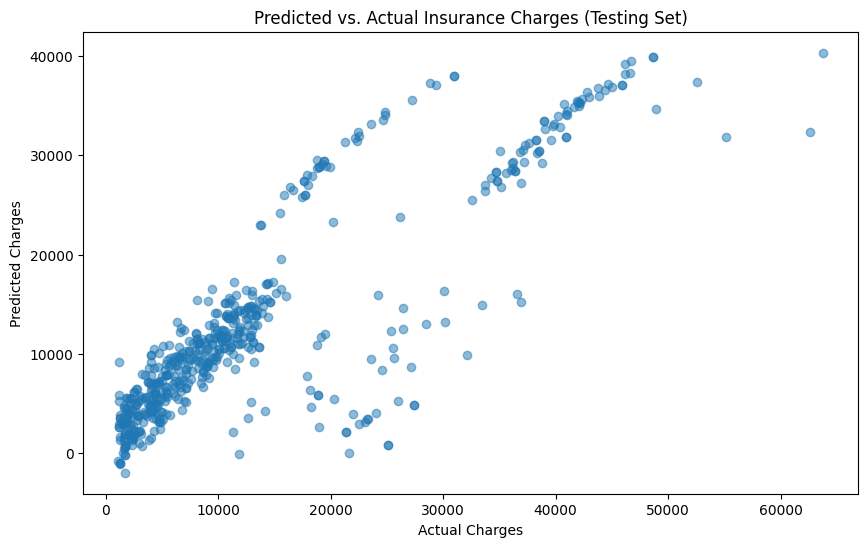

In [21]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(X_train, Y_train)

# Model Evaluation
# Predicting on training data
train_predictions = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, train_predictions)
print('R-squared (training):', r2_train)

# Predicting on test data
test_predictions = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_predictions)
print('R-squared (testing):', r2_test)


# Visualize Predictions vs. Actuals (Testing Set)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_predictions, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs. Actual Insurance Charges (Testing Set)')
plt.show()




## Predictions vs. Actuals

The scatter plot above illustrates the relationship between actual insurance charges and the model's predicted charges on the testing set. The points are clustered around the diagonal line, indicating that the model's predictions align reasonably well with the actual charges. Yet there are some deviations, especially for the higher insurance charges, the model could be improved.



### Conclusion

In this analysis, we successfully trained and evaluated a Linear Regression model to predict insurance charges based on demographic and health-related factors. 
